In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size = 0.2, random_state=42)
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train - train_mean) / train_std
x_val_scaled = (x_val - train_mean) / train_std

In [5]:
class SingleLayer:  
    def __init__(self, learning_rate = 0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses=[]
        self.w_history = []
        self.lr = learning_rate
    
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            self.update_val_loss(x_val, y_val)
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
            #print(val_loss)
        self.val_losses.append(val_loss/len(y_val))    

[0.08553810839308303, 0.06301966026864923, 0.058237436351365295, 0.056705233565734835, 0.054543438022724336, 0.05343011026990777, 0.04981057499632998, 0.06237488866059184, 0.05324638490075226, 0.06067816491932257, 0.05824905172257169, 0.05543476405438618, 0.06491313104082401, 0.05376623912175828, 0.045997890164433036, 0.06822947135344687, 0.06785269002768003, 0.051343398133601545, 0.05828682624839541, 0.045067043957763106, 0.048659118561201045, 0.05388829947746326, 0.060159968601194526, 0.050791543431403116, 0.05364427744774489, 0.05468579480114168, 0.05173114999547756, 0.06337119186339417, 0.05514504704464367, 0.059718094882982346, 0.06689553557313926, 0.06756771261195334, 0.05599694825530359, 0.054374840691097354, 0.05475526044632921, 0.053821978574151746, 0.061261924846982486, 0.055472320905254724, 0.058334373915317754, 0.062310519977449894, 0.05547453826790648, 0.04944736328636091, 0.05197455973121611, 0.055335077776258554, 0.051501440562592246, 0.07056237316166485, 0.0555841978375

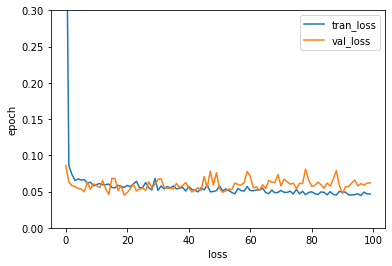

In [13]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
print(layer3.val_losses)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['tran_loss', 'val_loss'])
plt.show()

In [6]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978